In [1]:

from google.colab import files
uploaded = files.upload()

Saving deceptiondocword.csv to deceptiondocword.csv
Saving deceptionword.csv to deceptionword.csv
Saving mostfreq1000docword.csv to mostfreq1000docword.csv
Saving mostfreq1000word.csv to mostfreq1000word.csv
Saving speeches.csv to speeches.csv
Saving winners.csv to winners.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
import codecs

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Loading Data**


In [3]:
deceptiondocword = pd.read_csv("deceptiondocword.csv")
deceptionword = pd.read_csv("deceptionword.csv", header=None)
mostFreqMatrixWord = pd.read_csv("mostfreq1000docword.csv")
mostFreqWord = pd.read_csv("mostfreq1000word.csv", encoding= 'unicode_escape', header=None)
speeches= pd.read_csv("speeches.csv")
winner = pd.read_csv("winners.csv")

**Data Manipulation**

First I will reconfigure the datset in two dataframes. Each Dataframe will be have x labeled collumns containing multiple values. 


Changing MostFreqWord and Deception Word Dataframe into a list of strings,

In [4]:
Temp = mostFreqWord.values.tolist()
mostFreqWordList = []
for x in Temp:
  mostFreqWordList.append(x[0])
print("Most Frequent Words: ", mostFreqWordList)

Temp2 = deceptionword.values.tolist()
deceptionwordList = []
for y in Temp2:
  deceptionwordList.append(y[0])
print("Deception Words: ", deceptionwordList)

Most Frequent Words:  ['the_AT', 'and_CC', 'to_TO', 'of_IN', 'a_AT', 'in_IN', 'we_PPSS', 'i_PPSS', 'for_IN', 'is_BEZ', 'our_PP$', 'to_IN', 'that_CS', 'this_DT', 'have_HV', 'are_BER', 'will_MD', 'you_PPSS', 'on_IN', 'that_WPS', 'but_CC', 'be_BE', 'with_IN', 'they_PPSS', 'it_PPS', 'who_WPS', 'people_NNS', 'all_ABN', 'their_PP$', 'as_CS', 'you_PPO', 'can_MD', 'what_WDT', 'that_DT', 'it_PPO', 'do_DO', 'or_CC', 'america_NP', 'when_WRB', 'by_IN', "that's_DT", 'if_CS', 'from_IN', 'your_PP$', 'my_PP$', 'was_BEDZ', 'make_VB', 'at_IN', 'president_NN', 'he_PPS', 'has_HVZ', 'country_NN', 'now_RB', 'going_VBG', 'us_PPO', 'because_CS', 'more_AP', "it's_PPS", 'just_RB', 'american_JJ', 'new_JJ', 'an_AT', 'years_NNS', 'about_IN', 'want_VB', 'here_RB', 'jobs_NNS', 'up_RP', 'know_VB', 'them_PPO', 'time_NN', 'me_PPO', 'need_VB', 'tax_NN', 'every_AT', "we're_PPSS", 'been_BEN', 'get_VB', 'one_CD', 'than_CS', "i'm_PPSS", 'those_DTS', 'out_RP', "don't_DO", 'americans_NPS', 'economy_NN', 'some_DTI', "we've_PPS

In [5]:
mostFreqMatrixWord.head
# The Matrix is in the format of 430 x 1000 

<bound method NDFrame.head of      0.047838  0.037313  0.021814  ...     0.395  0.396  0.00019135.197
0    0.040797  0.031784  0.023482  ...  0.000237    0.0        0.000000
1    0.037022  0.033041  0.016919  ...  0.000000    0.0        0.000398
2    0.053289  0.037926  0.018243  ...  0.000480    0.0        0.000000
3    0.051535  0.029605  0.012061  ...  0.000000    0.0        0.000000
4    0.049890  0.029156  0.027472  ...  0.000389    0.0        0.000000
..        ...       ...       ...  ...       ...    ...             ...
425  0.049268  0.039281  0.017643  ...  0.000000    0.0        0.000000
426  0.042038  0.026396  0.022485  ...  0.000000    0.0        0.000000
427  0.036674  0.026976  0.026530  ...  0.000000    0.0        0.000000
428  0.041244  0.031104  0.028569  ...  0.000000    0.0        0.000293
429  0.051724  0.053050  0.022546  ...  0.000000    0.0        0.000000

[430 rows x 1000 columns]>

**Final Frequent Word Data Frame**

Concatinating Frequent Word Labels and Frequent Word Matrix into
a single dataframe. 




In [6]:

mostFreqMatrixWord.columns = mostFreqWordList
df1 = mostFreqMatrixWord
df1.head

<bound method NDFrame.head of        the_AT    and_CC     to_TO  ...  areas_NNS  outstanding_JJ  streets_NNS
0    0.040797  0.031784  0.023482  ...   0.000237             0.0     0.000000
1    0.037022  0.033041  0.016919  ...   0.000000             0.0     0.000398
2    0.053289  0.037926  0.018243  ...   0.000480             0.0     0.000000
3    0.051535  0.029605  0.012061  ...   0.000000             0.0     0.000000
4    0.049890  0.029156  0.027472  ...   0.000389             0.0     0.000000
..        ...       ...       ...  ...        ...             ...          ...
425  0.049268  0.039281  0.017643  ...   0.000000             0.0     0.000000
426  0.042038  0.026396  0.022485  ...   0.000000             0.0     0.000000
427  0.036674  0.026976  0.026530  ...   0.000000             0.0     0.000000
428  0.041244  0.031104  0.028569  ...   0.000000             0.0     0.000293
429  0.051724  0.053050  0.022546  ...   0.000000             0.0     0.000000

[430 rows x 1000 colu

Next I will add the win loss data, and speech data frame to the Data Frame

In [7]:
df1

,the_AT,and_CC,to_TO,of_IN,a_AT,in_IN,we_PPSS,i_PPSS,for_IN,is_BEZ,our_PP$,to_IN,that_CS,this_DT,have_HV,are_BER,will_MD,you_PPSS,on_IN,that_WPS,but_CC,be_BE,with_IN,they_PPSS,it_PPS,who_WPS,people_NNS,all_ABN,their_PP$,as_CS,you_PPO,can_MD,what_WDT,that_DT,it_PPO,do_DO,or_CC,america_NP,when_WRB,by_IN,...,promised_VBD,used_VBN,character_NN,uniform_NN,remind_VB,tuition_NN,father_NN,happens_VBZ,30_CD,infrastructure_NN,available_JJ,retirement_NN,south_JJ,agree_VB,terrorist_JJ,process_NN,ability_NN,liberty_NN,hands_NNS,losing_VBG,prevent_VB,leader_NN,institutions_NNS,legislation_NN,_VBZ,profits_NNS,wealthy_JJ,homeowners_NNS,republican_JJ,road_NN,equal_JJ,east_NR,walk_VB,morning_NN,decision_NN,led_VBD,september_NP,areas_NNS,outstanding_JJ,streets_NNS
0,0.040797,0.031784,0.023482,0.016603,0.022770,0.022533,0.010199,0.011860,0.010199,0.008776,0.001660,0.006404,0.005693,0.006404,0.008539,0.004507,0.002372,0.016129,0.004981,0.003321,0.005930,0.005930,0.006167,0.006641,0.003083,0.003558,0.011148,0.003083,0.004032,0.001423,0.005455,0.003558,0.008539,0.003558,0.007827,0.006404,0.002846,0.001423,0.002372,0.004507,...,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000474,0.000000,0.000237,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000237,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000237,0.0,0.000000
1,0.037022,0.033041,0.016919,0.018113,0.019904,0.016322,0.013734,0.017914,0.007166,0.009355,0.012540,0.008161,0.005971,0.005772,0.006569,0.006369,0.004976,0.005971,0.004976,0.002986,0.008161,0.004777,0.005374,0.002986,0.004379,0.002986,0.005772,0.005374,0.002388,0.002787,0.002787,0.005772,0.003185,0.003384,0.006369,0.005971,0.003384,0.007564,0.002787,0.002190,...,0.000398,0.000000,0.00000,0.0,0.000000,0.0,0.000597,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000199,0.000199,0.000398,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000199,0.000199,0.000000,0.000000,0.000000,0.000199,0.000000,0.0,0.000000,0.0,0.000398
2,0.053289,0.037926,0.018243,0.024964,0.015362,0.027844,0.012962,0.002880,0.009122,0.007201,0.017283,0.013442,0.004321,0.009122,0.003360,0.004321,0.008161,0.000480,0.002880,0.003360,0.003360,0.003360,0.006721,0.003360,0.003360,0.003360,0.000960,0.002880,0.002400,0.006241,0.000000,0.002880,0.000480,0.002880,0.000960,0.001920,0.002400,0.000960,0.002880,0.002400,...,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000960,0.000000,0.000480,0.000000,0.000000,0.000480,0.000000,0.000000,0.000000,0.000480,0.000960,0.000000,0.0,0.0,0.000000,0.0,0.000480,0.000000,0.000000,0.000480,0.000000,0.000000,0.000000,0.000000,0.0,0.000480,0.0,0.000000
3,0.051535,0.029605,0.012061,0.026316,0.025219,0.020833,0.002193,0.010965,0.006579,0.006579,0.008772,0.013158,0.004386,0.005483,0.002193,0.004386,0.002193,0.000000,0.007675,0.004386,0.007675,0.003290,0.003290,0.000000,0.008772,0.000000,0.005483,0.000000,0.004386,0.004386,0.000000,0.003290,0.001097,0.002193,0.001097,0.001097,0.000000,0.000000,0.003290,0.006579,...,0.000000,0.001097,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.002193,0.000000,0.000000,0.001097,0.000000,0.0,0.000000,0.0,0.000000
4,0.049890,0.029156,0.027472,0.023196,0.015550,0.018660,0.020086,0.013477,0.012310,0.007386,0.013218,0.010755,0.009071,0.011922,0.006738,0.003240,0.009848,0.002203,0.006479,0.003887,0.005313,0.007386,0.005054,0.003240,0.005831,0.003887,0.005702,0.005442,0.002721,0.007127,0.003369,0.003499,0.002073,0.002203,0.003628,0.004406,0.002462,0.001296,0.000648,0.005442,...,0.000000,0.000130,0.00013,0.0,0.000000,0.0,0.000000,0.000000,0.000518,0.0,0.000389,0.0,0.000000,0.000259,0.000000,0.000000,0.000000,0.000000,0.000259,0.00013

In [8]:

temp = df1
temp['Win/Loss'] = winner
tempwithWinLoss = temp
tempwithWinLoss
#mostFreq1000WordFixed['Speech'] = speeches
#mostFreq1000WordFixedt

,the_AT,and_CC,to_TO,of_IN,a_AT,in_IN,we_PPSS,i_PPSS,for_IN,is_BEZ,our_PP$,to_IN,that_CS,this_DT,have_HV,are_BER,will_MD,you_PPSS,on_IN,that_WPS,but_CC,be_BE,with_IN,they_PPSS,it_PPS,who_WPS,people_NNS,all_ABN,their_PP$,as_CS,you_PPO,can_MD,what_WDT,that_DT,it_PPO,do_DO,or_CC,america_NP,when_WRB,by_IN,...,used_VBN,character_NN,uniform_NN,remind_VB,tuition_NN,father_NN,happens_VBZ,30_CD,infrastructure_NN,available_JJ,retirement_NN,south_JJ,agree_VB,terrorist_JJ,process_NN,ability_NN,liberty_NN,hands_NNS,losing_VBG,prevent_VB,leader_NN,institutions_NNS,legislation_NN,_VBZ,profits_NNS,wealthy_JJ,homeowners_NNS,republican_JJ,road_NN,equal_JJ,east_NR,walk_VB,morning_NN,decision_NN,led_VBD,september_NP,areas_NNS,outstanding_JJ,streets_NNS,Win/Loss
0,0.040797,0.031784,0.023482,0.016603,0.022770,0.022533,0.010199,0.011860,0.010199,0.008776,0.001660,0.006404,0.005693,0.006404,0.008539,0.004507,0.002372,0.016129,0.004981,0.003321,0.005930,0.005930,0.006167,0.006641,0.003083,0.003558,0.011148,0.003083,0.004032,0.001423,0.005455,0.003558,0.008539,0.003558,0.007827,0.006404,0.002846,0.001423,0.002372,0.004507,...,0.000000,0.00000,0.0,0.000000,0.0,0.000474,0.000000,0.000237,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000237,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000237,0.0,0.000000,1
1,0.037022,0.033041,0.016919,0.018113,0.019904,0.016322,0.013734,0.017914,0.007166,0.009355,0.012540,0.008161,0.005971,0.005772,0.006569,0.006369,0.004976,0.005971,0.004976,0.002986,0.008161,0.004777,0.005374,0.002986,0.004379,0.002986,0.005772,0.005374,0.002388,0.002787,0.002787,0.005772,0.003185,0.003384,0.006369,0.005971,0.003384,0.007564,0.002787,0.002190,...,0.000000,0.00000,0.0,0.000000,0.0,0.000597,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000199,0.000199,0.000398,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000199,0.000199,0.000000,0.000000,0.000000,0.000199,0.000000,0.0,0.000000,0.0,0.000398,1
2,0.053289,0.037926,0.018243,0.024964,0.015362,0.027844,0.012962,0.002880,0.009122,0.007201,0.017283,0.013442,0.004321,0.009122,0.003360,0.004321,0.008161,0.000480,0.002880,0.003360,0.003360,0.003360,0.006721,0.003360,0.003360,0.003360,0.000960,0.002880,0.002400,0.006241,0.000000,0.002880,0.000480,0.002880,0.000960,0.001920,0.002400,0.000960,0.002880,0.002400,...,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000960,0.000000,0.000480,0.000000,0.000000,0.000480,0.000000,0.000000,0.000000,0.000480,0.000960,0.000000,0.0,0.0,0.000000,0.0,0.000480,0.000000,0.000000,0.000480,0.000000,0.000000,0.000000,0.000000,0.0,0.000480,0.0,0.000000,1
3,0.051535,0.029605,0.012061,0.026316,0.025219,0.020833,0.002193,0.010965,0.006579,0.006579,0.008772,0.013158,0.004386,0.005483,0.002193,0.004386,0.002193,0.000000,0.007675,0.004386,0.007675,0.003290,0.003290,0.000000,0.008772,0.000000,0.005483,0.000000,0.004386,0.004386,0.000000,0.003290,0.001097,0.002193,0.001097,0.001097,0.000000,0.000000,0.003290,0.006579,...,0.001097,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.002193,0.000000,0.000000,0.001097,0.000000,0.0,0.000000,0.0,0.000000,1
4,0.049890,0.029156,0.027472,0.023196,0.015550,0.018660,0.020086,0.013477,0.012310,0.007386,0.013218,0.010755,0.009071,0.011922,0.006738,0.003240,0.009848,0.002203,0.006479,0.003887,0.005313,0.007386,0.005054,0.003240,0.005831,0.003887,0.005702,0.005442,0.002721,0.007127,0.003369,0.003499,0.002073,0.002203,0.003628,0.004406,0.002462,0.001296,0.000648,0.005442,...,0.000130,0.00013,0.0,0.000000,0.0,0.000000,0.000000,0.000518,0.0,0.000389,0.0,0.000000,0.000259,0.000000,0.000000,0.000000,0.000000,0.000259,0.000130,0.000000,0.000000,0.000259,0.000000,0.0

Next I will create Dataframe for Deception Words 

In [9]:
deceptiondocword

,21,19,11,9,7,6,1,7.1,2,5,2.1,0,3,2.2,0.1,1.1,0.2,0.3,0.4,0.5,0.6,0.7,2.3,2.4,2.5,0.8,0.9,0.10,1.2,0.11,0.12,0.13,2.6,0.14,1.3,0.15,0.16,1.4,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54
0,50,25,12,6,16,22,10,20,1,0,9,3,1,0,2,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,90,41,17,31,8,15,2,5,6,1,3,2,6,3,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,7,5,5,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10,7,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,104,41,19,9,10,21,0,7,6,1,3,2,2,1,2,3,2,2,0,1,0,1,5,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,28,19,6,2,1,4,2,1,0,5,2,4,0,2,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
426,152,54,18,47,53,13,31,15,16,13,17,17,3,1,1,2,9,7,0,0,0,2,0,4,3,0,0,1,2,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
427,175,30,20,38,56,18,28,15,9,8,9,12,5,0,0,0,4,7,1,0,0,1,0,3,6,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
428,198,57,12,11,54,19,0,20,18,0,24,0,1,4,4,6,0,3,4,0,3,0,1,1,0,0,0,1,1,3,1,0,0,1,1,1,0,0,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
deceptiondocword.columns = deceptionwordList
deceptiondocword

,i,but,or,my,going,me,i'm,go,take,i've,look,i'll,without,lead,move,run,i'd,taking,action,fear,walk,goes,unless,rather,bringing,drive,enemy,myself,follow,carry,terrible,moved,loss,however,mine,afraid,nor,although,except,greed,tragedy,hate,driven,disappointed,anger,lies,weak,sorry,arrived,lie,carrying,followed,abandon,crazy,flew,jerk,lonely,hated,arrive,hates,suspicious,besides,inadequate,worthless,arrives,vain,dumb,lied,agony,ignorant,fled,despise,inferior,boring,dislike,anguish
0,50,25,12,6,16,22,10,20,1,0,9,3,1,0,2,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,90,41,17,31,8,15,2,5,6,1,3,2,6,3,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,7,5,5,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10,7,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,104,41,19,9,10,21,0,7,6,1,3,2,2,1,2,3,2,2,0,1,0,1,5,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,28,19,6,2,1,4,2,1,0,5,2,4,0,2,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
426,152,54,18,47,53,13,31,15,16,13,17,17,3,1,1,2,9,7,0,0,0,2,0,4,3,0,0,1,2,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
427,175,30,20,38,56,18,28,15,9,8,9,12,5,0,0,0,4,7,1,0,0,1,0,3,6,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
428,198,57,12,11,54,19,0,20,18,0,24,0,1,4,4,6,0,3,4,0,3,0,1,1,0,0,0,1,1,3,1,0,0,1,1,1,0,0,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Next I will add win loss and speech columns in to the dataframe

In [11]:
deceptiondocword['Win/Loss'] = winner
deceptiondocword['Speech'] = speeches
deceptiondocword

,i,but,or,my,going,me,i'm,go,take,i've,look,i'll,without,lead,move,run,i'd,taking,action,fear,walk,goes,unless,rather,bringing,drive,enemy,myself,follow,carry,terrible,moved,loss,however,mine,afraid,nor,although,except,greed,tragedy,hate,driven,disappointed,anger,lies,weak,sorry,arrived,lie,carrying,followed,abandon,crazy,flew,jerk,lonely,hated,arrive,hates,suspicious,besides,inadequate,worthless,arrives,vain,dumb,lied,agony,ignorant,fled,despise,inferior,boring,dislike,anguish,Win/Loss,Speech
0,50,25,12,6,16,22,10,20,1,0,9,3,1,0,2,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1992clinton920422.txt
1,90,41,17,31,8,15,2,5,6,1,3,2,6,3,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1992clinton920716.txt
2,6,7,5,5,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1992clinton920814.txt
3,10,7,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1992clinton921002.txt
4,104,41,19,9,10,21,0,7,6,1,3,2,2,1,2,3,2,2,0,1,0,1,5,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1994clinton930217.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,28,19,6,2,1,4,2,1,0,5,2,4,0,2,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012romney120925.txt
426,152,54,18,47,53,13,31,15,16,13,17,17,3,1,1,2,9,7,0,0,0,2,0,4,3,0,0,1,2,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012romney121003debate1r.txt
427,175,30,20,38,56,18,28,15,9,8,9,12,5,0,0,0,4,7,1,0,0,1,0,3,6,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012romney121016debate2r.txt
428,198,57,12,11,54,19,0,20,18,0,24,0,1,4,4,6,0,3,4,0,3,0,1,1,0,0,0,1,1,3,1,0,0,1,1,1,0,0,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012romney121022debate3.txt


Spliting Data


In [12]:
df1

,the_AT,and_CC,to_TO,of_IN,a_AT,in_IN,we_PPSS,i_PPSS,for_IN,is_BEZ,our_PP$,to_IN,that_CS,this_DT,have_HV,are_BER,will_MD,you_PPSS,on_IN,that_WPS,but_CC,be_BE,with_IN,they_PPSS,it_PPS,who_WPS,people_NNS,all_ABN,their_PP$,as_CS,you_PPO,can_MD,what_WDT,that_DT,it_PPO,do_DO,or_CC,america_NP,when_WRB,by_IN,...,used_VBN,character_NN,uniform_NN,remind_VB,tuition_NN,father_NN,happens_VBZ,30_CD,infrastructure_NN,available_JJ,retirement_NN,south_JJ,agree_VB,terrorist_JJ,process_NN,ability_NN,liberty_NN,hands_NNS,losing_VBG,prevent_VB,leader_NN,institutions_NNS,legislation_NN,_VBZ,profits_NNS,wealthy_JJ,homeowners_NNS,republican_JJ,road_NN,equal_JJ,east_NR,walk_VB,morning_NN,decision_NN,led_VBD,september_NP,areas_NNS,outstanding_JJ,streets_NNS,Win/Loss
0,0.040797,0.031784,0.023482,0.016603,0.022770,0.022533,0.010199,0.011860,0.010199,0.008776,0.001660,0.006404,0.005693,0.006404,0.008539,0.004507,0.002372,0.016129,0.004981,0.003321,0.005930,0.005930,0.006167,0.006641,0.003083,0.003558,0.011148,0.003083,0.004032,0.001423,0.005455,0.003558,0.008539,0.003558,0.007827,0.006404,0.002846,0.001423,0.002372,0.004507,...,0.000000,0.00000,0.0,0.000000,0.0,0.000474,0.000000,0.000237,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000237,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000237,0.0,0.000000,1
1,0.037022,0.033041,0.016919,0.018113,0.019904,0.016322,0.013734,0.017914,0.007166,0.009355,0.012540,0.008161,0.005971,0.005772,0.006569,0.006369,0.004976,0.005971,0.004976,0.002986,0.008161,0.004777,0.005374,0.002986,0.004379,0.002986,0.005772,0.005374,0.002388,0.002787,0.002787,0.005772,0.003185,0.003384,0.006369,0.005971,0.003384,0.007564,0.002787,0.002190,...,0.000000,0.00000,0.0,0.000000,0.0,0.000597,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000199,0.000199,0.000398,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000199,0.000199,0.000000,0.000000,0.000000,0.000199,0.000000,0.0,0.000000,0.0,0.000398,1
2,0.053289,0.037926,0.018243,0.024964,0.015362,0.027844,0.012962,0.002880,0.009122,0.007201,0.017283,0.013442,0.004321,0.009122,0.003360,0.004321,0.008161,0.000480,0.002880,0.003360,0.003360,0.003360,0.006721,0.003360,0.003360,0.003360,0.000960,0.002880,0.002400,0.006241,0.000000,0.002880,0.000480,0.002880,0.000960,0.001920,0.002400,0.000960,0.002880,0.002400,...,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000960,0.000000,0.000480,0.000000,0.000000,0.000480,0.000000,0.000000,0.000000,0.000480,0.000960,0.000000,0.0,0.0,0.000000,0.0,0.000480,0.000000,0.000000,0.000480,0.000000,0.000000,0.000000,0.000000,0.0,0.000480,0.0,0.000000,1
3,0.051535,0.029605,0.012061,0.026316,0.025219,0.020833,0.002193,0.010965,0.006579,0.006579,0.008772,0.013158,0.004386,0.005483,0.002193,0.004386,0.002193,0.000000,0.007675,0.004386,0.007675,0.003290,0.003290,0.000000,0.008772,0.000000,0.005483,0.000000,0.004386,0.004386,0.000000,0.003290,0.001097,0.002193,0.001097,0.001097,0.000000,0.000000,0.003290,0.006579,...,0.001097,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.002193,0.000000,0.000000,0.001097,0.000000,0.0,0.000000,0.0,0.000000,1
4,0.049890,0.029156,0.027472,0.023196,0.015550,0.018660,0.020086,0.013477,0.012310,0.007386,0.013218,0.010755,0.009071,0.011922,0.006738,0.003240,0.009848,0.002203,0.006479,0.003887,0.005313,0.007386,0.005054,0.003240,0.005831,0.003887,0.005702,0.005442,0.002721,0.007127,0.003369,0.003499,0.002073,0.002203,0.003628,0.004406,0.002462,0.001296,0.000648,0.005442,...,0.000130,0.00013,0.0,0.000000,0.0,0.000000,0.000000,0.000518,0.0,0.000389,0.0,0.000000,0.000259,0.000000,0.000000,0.000000,0.000000,0.000259,0.000130,0.000000,0.000000,0.000259,0.000000,0.0

**Statistics**

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.2)
print(train)

       the_AT    and_CC     to_TO  ...  outstanding_JJ  streets_NNS  Win/Loss
213  0.039710  0.030743  0.012810  ...        0.000000     0.000427         1
223  0.043006  0.051357  0.009603  ...        0.000000     0.000835         1
106  0.048228  0.032976  0.025969  ...        0.000000     0.000000         0
354  0.034552  0.034888  0.023147  ...        0.000335     0.000000         1
117  0.043877  0.039293  0.023576  ...        0.000000     0.000000         0
..        ...       ...       ...  ...             ...          ...       ...
98   0.044545  0.024038  0.025887  ...        0.000000     0.000000         1
14   0.038732  0.029225  0.025352  ...        0.000000     0.000352         1
33   0.044032  0.032059  0.011587  ...        0.000000     0.000000         0
244  0.036324  0.033260  0.018818  ...        0.000438     0.000000         1
10   0.045290  0.031779  0.026641  ...        0.000000     0.000000         1

[344 rows x 1001 columns]


In [14]:
from sklearn.neural_network import MLPClassifier

# Initiated Neurel Network
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

# Fit the model using training set
mlp.fit(train.iloc[:, df1.columns != 'Win/Loss'], train['Win/Loss'])

# Predicted the learner using the test data set
predictions = mlp.predict(test.iloc[:, df1.columns != 'Win/Loss'])

# Checked the scorer
mlp.score(test.iloc[:, df1.columns != 'Win/Loss'], test['Win/Loss'])



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8255813953488372

**Data Visualization**

<Figure size 2592x432 with 0 Axes>

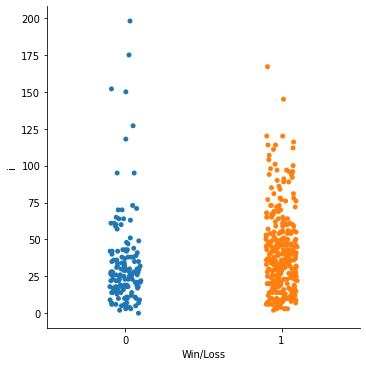

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the width and height of the figure
plt.figure(figsize=(36,6))

# Visualizin the data on how often a president uses I in their speech.
sns.catplot(x="Win/Loss", y="i", data=deceptiondocword)

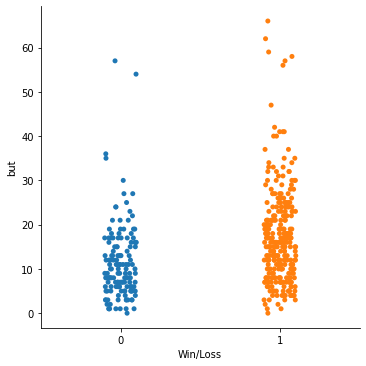

In [16]:

# Visualizin the data on how often a president using 'but' in their speech.
sns.catplot(x="Win/Loss", y="but", data=deceptiondocword)

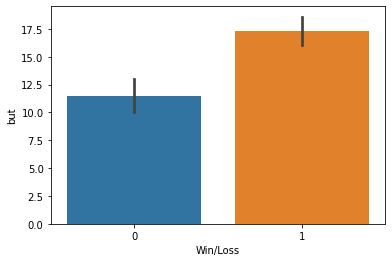

In [17]:
# Visualizin the data on how often a president using 'but' in their speech.
sns.barplot(x="Win/Loss", y="but", data=deceptiondocword)

In [18]:
df1.describe()

,the_AT,and_CC,to_TO,of_IN,a_AT,in_IN,we_PPSS,i_PPSS,for_IN,is_BEZ,our_PP$,to_IN,that_CS,this_DT,have_HV,are_BER,will_MD,you_PPSS,on_IN,that_WPS,but_CC,be_BE,with_IN,they_PPSS,it_PPS,who_WPS,people_NNS,all_ABN,their_PP$,as_CS,you_PPO,can_MD,what_WDT,that_DT,it_PPO,do_DO,or_CC,america_NP,when_WRB,by_IN,...,used_VBN,character_NN,uniform_NN,remind_VB,tuition_NN,father_NN,happens_VBZ,30_CD,infrastructure_NN,available_JJ,retirement_NN,south_JJ,agree_VB,terrorist_JJ,process_NN,ability_NN,liberty_NN,hands_NNS,losing_VBG,prevent_VB,leader_NN,institutions_NNS,legislation_NN,_VBZ,profits_NNS,wealthy_JJ,homeowners_NNS,republican_JJ,road_NN,equal_JJ,east_NR,walk_VB,morning_NN,decision_NN,led_VBD,september_NP,areas_NNS,outstanding_JJ,streets_NNS,Win/Loss
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,...,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,0.041768,0.032741,0.022074,0.022118,0.017503,0.016278,0.014174,0.011725,0.010445,0.009109,0.009166,0.008706,0.008156,0.007469,0.006495,0.005780,0.006203,0.004894,0.005319,0.004826,0.004552,0.004600,0.004525,0.004091,0.004100,0.003950,0.003518,0.003736,0.003650,0.003679,0.003441,0.003398,0.003258,0.003195,0.003024,0.002934,0.003064,0.003073,0.002969,0.002989,...,0.000112,0.000116,0.000106,0.000088,0.000095,0.000114,0.000100,0.000087,0.000108,0.000109,0.000122,0.000114,0.000088,0.000085,0.000137,0.000107,0.000110,0.000102,0.000101,0.000109,0.000117,0.000109,0.000129,0.000112,0.000101,0.000092,0.000122,0.000097,0.000109,0.000124,0.000083,0.000089,0.000125,0.000102,0.000114,0.000082,0.000109,0.000105,0.000097,0.669767
std,0.008216,0.005965,0.005506,0.006502,0.003510,0.003586,0.005455,0.005307,0.003146,0.003047,0.004458,0.002993,0.003486,0.003346,0.002565,0.002261,0.004477,0.003634,0.002011,0.002266,0.001713,0.002242,0.001978,0.002271,0.002025,0.002075,0.002394,0.001790,0.002075,0.001953,0.002763,0.002067,0.002040,0.001463,0.001761,0.001752,0.001897,0.001888,0.001631,0.001451,...,0.000270,0.000310,0.000285,0.000190,0.000198,0.000463,0.000258,0.000192,0.000300,0.000247,0.000387,0.000423,0.000198,0.000352,0.000572,0.000238,0.000396,0.000227,0.000230,0.000237,0.000313,0.000366,0.000455,0.000396,0.000247,0.000209,0.000413,0.000312,0.000253,0.000407,0.000238,0.000212,0.000281,0.000256,0.000300,0.000266,0.000304,0.000351,0.000252,0.470845
min,0.017045,0.014831,0.004870,0.009006,0.005682,0.000000,0.000000,0.000000,0.002571,0.002492,0.000960,0.002584,0.000607,0.000000,0.001131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.036271,0.028693,0.018647,0.017153,0.015196,0.013884,0.009965,0.008219,0.008402,0.007043,0.006023,0.006701,0.005670,0.005398,0.004693,0.004283,0.002699,0.001926,0.0042

** Dimension Reduction ** 


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition